# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = mouse_metadata.merge(study_results, on= "Mouse ID")

# Display the data table for preview
mouse_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
len(mouse_df["Mouse ID"].unique())
#249

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_df[mouse_df.duplicated(subset = ["Mouse ID", "Timepoint"])]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupes = mouse_df[mouse_df["Mouse ID"] == "g989"]
dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = mouse_df[mouse_df["Mouse ID"] != "g989"]

In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_stats = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()
tumor_stats["var"] = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_stats["sem"] = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
tumor_stats

,count,mean,std,min,25%,50%,75%,max,var,sem
Drug Regimen,,,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209,24.947764,0.329346
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185,39.290177,0.469821
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731,43.128684,0.492236
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014,68.553577,0.603860
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817,66.173479,0.596466
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939,61.168083,0.581331
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421,43.852013,0.544332
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816,23.486704,0.320955
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690,59.450562,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce thesame summary statistics in a single line


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

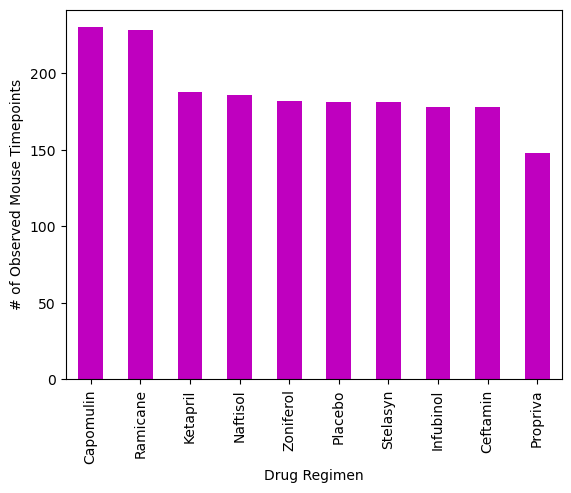

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# mouse_df.plot.bar(x="Mouse ID", y=mouse_df['Drug Regimen'].value_counts())
mouse_df['Drug Regimen'].value_counts().plot.bar(
    color = "m", ylabel= "# of Observed Mouse Timepoints")

Text(0, 0.5, '# of Observed Mouse Timepoints')

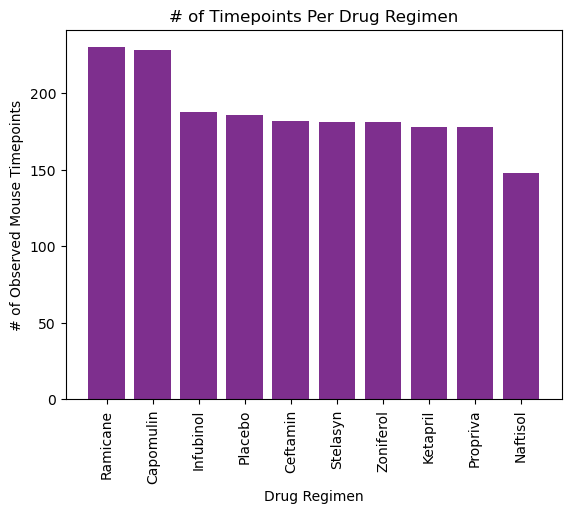

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(mouse_df['Drug Regimen'].unique(), mouse_df['Drug Regimen'].value_counts(),
        color = "#7E2F8E", align="center")
plt.xticks(rotation=90)
plt.title("# of Timepoints Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

<Axes: title={'center': 'Sexes of Observed Mice'}, ylabel='count'>

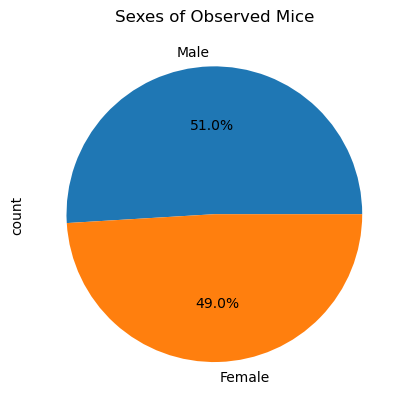

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_df['Sex'].value_counts().plot.pie(
    title= "Sexes of Observed Mice", autopct='%1.1f%%')

Text(0.5, 1.0, 'Division of Sex in Observed Mice')

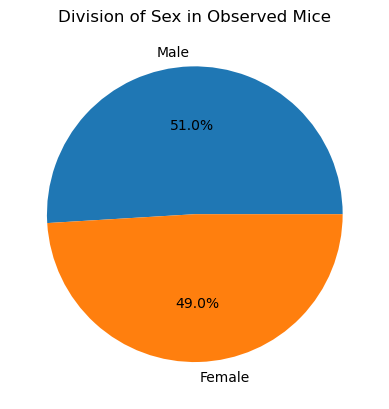

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = mouse_df["Sex"].value_counts()
plt.pie(genders, labels=["Male", "Female"], autopct='%1.1f%%')
plt.title('Division of Sex in Observed Mice')

## Quartiles, Outliers and Boxplots

In [13]:
#this is a box to test things
## DELETE LATER ##


# last_tp = mouse_df.loc[mouse_df["Timepoint"] == 45]
# last_tp = last_tp.loc[last_tp["Drug Regimen"].isin(drug_names)]
# last_tp


In [156]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_names = ["Capomulin", "Ramicane", "Ceftamin","Infubinol"]
drugs = mouse_df.loc[mouse_df["Drug Regimen"].isin(drug_names)]

# Start by getting the last (greatest) timepoint for each mouse
    # max timepoint is 45
last_tp = pd.DataFrame(drugs.groupby("Mouse ID")["Timepoint"].max())


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tp["Drug Regimen"] = drugs.groupby("Mouse ID")["Drug Regimen"].first()
last_tp["Tumor Volume (mm3)"] = drugs.groupby("Mouse ID")["Tumor Volume (mm3)"].last()
last_tp = last_tp.reset_index()

last_tp.head()

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a275,45,Ceftamin,62.999356
3,a411,45,Ramicane,38.407618
4,a444,45,Ramicane,43.047543


In [201]:
# Put treatments into a list for for loop (and later for plot labels)
drug_names

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_names:
    #to reset the list for each drug
    tumor_vol = []
    #for each row in the df, if the name of the drug matches the column name then add the cooresponding tumor volume
    for index, row in last_tp.iterrows():
        if row['Drug Regimen'] == drug:
            tumor_vol.append(row['Tumor Volume (mm3)'])
        
    # Calculating upper and lower bounds
        iqr = st.iqr(tumor_vol)
        lower_b = st.scoreatpercentile(tumor_vol, 25) - iqr
        upper_b = st.scoreatpercentile(tumor_vol, 75) + iqr
        #determining outliers
        #i feel like there is a simpler way to do this but my brain is pretty fried right now
        outliers = []
        for vol in range(len(tumor_vol)):
            if tumor_vol[vol] < lower_b or tumor_vol[vol] > upper_b:
                outliers.append(tumor_vol[vol])
    print(f"{drug}'s potential outliers: {set(outliers)}")

Capomulin's potential outliers: {23.34359787}
Ramicane's potential outliers: {22.05012627}
Ceftamin's potential outliers: set()
Infubinol's potential outliers: {36.3213458}


36.3213458

<Axes: title={'center': 'Tumor Volume (mm3)'}, xlabel='Drug Regimen'>

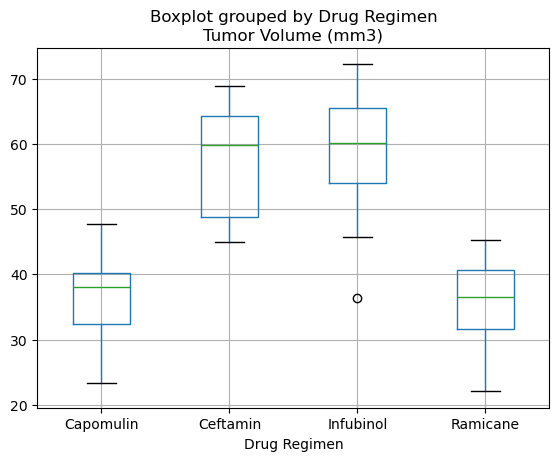

In [148]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
last_tp.boxplot(column= "Tumor Volume (mm3)",by="Drug Regimen")

## Line and Scatter Plots

In [179]:
# narrowing down to just Capomulin and unique Mouse IDs
(mouse_df.loc[mouse_df["Drug Regimen"] == "Capomulin"])["Mouse ID"].unique()


array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

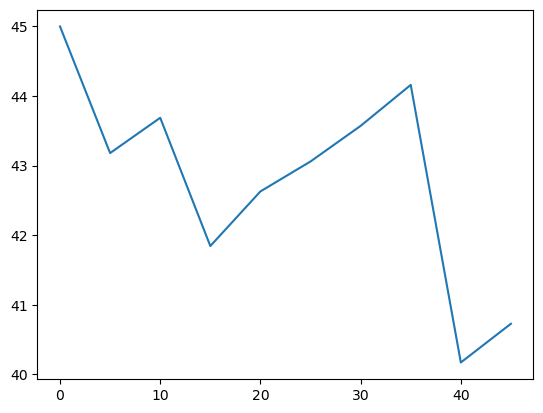

In [181]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plt = mouse_df.loc[mouse_df["Mouse ID"] == "s710"]
plt.plot(line_plt["Timepoint"], line_plt["Tumor Volume (mm3)"])



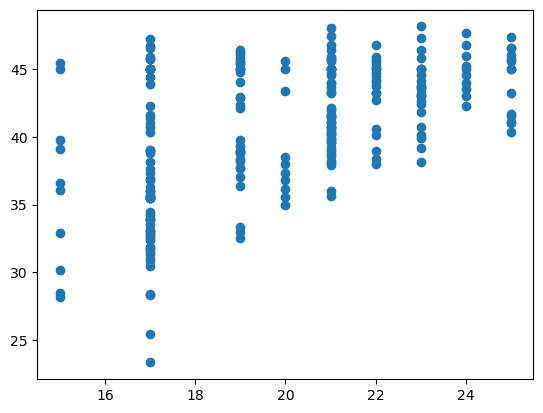

In [214]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_plt = mouse_df.loc[mouse_df["Drug Regimen"] == "Capomulin"]
y = mouse_df.groupby("Mouse ID")["Drug Regimen"].first()
plt.scatter(scatter_plt["Weight (g)"], scatter_plt["Tumor Volume (mm3)"])

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


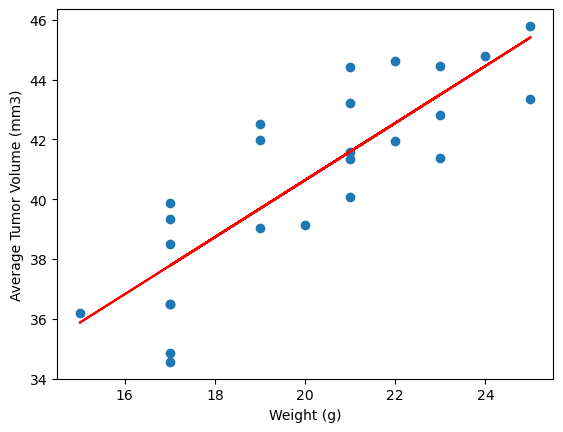

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
